In [121]:
# This reload library is just used for developing the REPUBLIC hOCR parser 
# and can be removed once this module is stable.
%reload_ext autoreload
%autoreload 2

import os
from copy import copy
import nltk
#from bs4.dammit import UnicodeDammit
from collections import Counter
#from unicodecsv import DictReader, DictWriter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd

stopwords = stopwords.words('english')

In [104]:
import sys
sys.path.append('/Users/rikhoekstra/develop/migrant_discourse/')

## Read records 

Using csv file of records from the __International Migration Review__ http://onlinelibrary.wiley.com/doi/10.1111

And add a category by year

In [26]:
df = pd.read_csv('../data/wileyrecs.csv')

In [115]:
df = df.loc[df.AU != '']

In [116]:
labels = ["{i}".format(i=i) for i in range(1950, 2020, 10)]

df["group"] = pd.cut(df.PY, range(1950, 2020, 9), right=False, labels=labels)
df

,AU,TI,PY,JO,group
0,NaN,The New Director Of Icem,1961.0,Migracion,1960
1,"Perotti, Antonio",The Migration Problem And The Encyclical “Mate...,1961.0,Migracion,1960
2,"Marsal, Juan F.",Argentina As An Immigration Country,1961.0,Migracion,1960
3,"Dominedo, M.",How Migration Affects The Country Of Emigration,1961.0,Migracion,1960
4,"Zubrzycki, Jerzy",Sociological Methods For The Study Of Immigran...,1961.0,Migracion,1960
...,...,...,...,...,...
1141,"Düvell, Franck",Introduction,2011.0,International Migration,2010
1142,"Jandl, Michael","Methods, Approaches and Data Sources for Estim...",2011.0,International Migration,2010
1143,"Prescott, Hannah",The Size of the Irregular Migrant Population i...,2011.0,International Migration,2010
1144,"Reichel, David",Measuring Irregular Migration and Population F...,2011.0,International Migration,2010


In [97]:
# poc of term frequency count for titles per group (of ten years)

from copy import copy
groupedtext = {}
def toktxt(txt):
    """returns counter of terms in text"""
    ltxt = txt.lower()
    splttxt = nltk.tokenize.word_tokenize(ltxt)
    c = Counter(splttxt)
    return(c)

grouped = df.groupby(['group'])
for group in grouped:
    t = group[1].TI.str.cat(sep=', ')
    tok = toktxt(t)
    cleantok = [t for t in tok.keys() if t not in stopwords] #filter out stop words
    cleantok = [t for t in cleantok if len(t)>2] # filter out non-words
    groupedtext[group[0]] = {t:tok[t] for t in cleantok}

# txtout = copy(groupedtext)
# for k in txtout.keys():
#      if txtout[k] == []:
#         del(groupedtext[k])

In [98]:
groupedtext

{'1950': {},
 '1960': {'new': 3,
  'director': 1,
  'icem': 5,
  'migration': 25,
  'problem': 1,
  'encyclical': 1,
  'mater': 1,
  'magistra': 1,
  'argentina': 2,
  'immigration': 17,
  'country': 4,
  'affects': 2,
  'emigration': 12,
  'sociological': 1,
  'methods': 1,
  'study': 1,
  'immigrant': 5,
  'adjustement': 1,
  'foreword': 2,
  'editorial': 2,
  'influence': 4,
  'australian': 5,
  'foreign': 2,
  'policy*': 1,
  'prospects': 1,
  'machinery': 1,
  'european': 9,
  'movements': 1,
  'within': 1,
  'economic': 5,
  'community': 1,
  'importance': 1,
  'development': 7,
  'brazil': 2,
  'greece': 1,
  'information': 2,
  'resolutions': 1,
  'thirteenth': 1,
  'session': 1,
  'council': 2,
  'intergovernmental': 4,
  'committee': 3,
  'book': 1,
  'reviews': 1,
  'bibliography': 2,
  'partnership': 1,
  'planned': 1,
  'report': 2,
  'year': 2,
  '1960': 1,
  'greek': 1,
  'immigrants': 6,
  'australia': 7,
  'trends': 1,
  'international': 6,
  'skilled': 1,
  'manpower'

In [113]:
#this used to be the wordcloud code
# ts = {"{i}".format(i=i):[] for i in range(1880, 2010, 10)}
# ts


# for i in dl:
#     try:
#         x = [k for k in ts.keys() if int(i['PY']) in range(int(k), int(k)+10)][0]
#         ts[x].append(i)
#     except ValueError:
#         print (i)

# txtout = dict.fromkeys(ts.keys())

# for k in ts.keys():
#     txt = ' '.join([i['TI'] for i in ts[k]])
#     txt = txt.lower()
#     try:
#         tok = tokenizer(UnicodeDammit(txt).unicode_markup)
#     except UnicodeEncodeError:
#         pass # dan niet
#     tok = [t for t in tok if t not in stopwords]
#     tok = [t for t in tok if len(t)>2]
#     txtout[k] = tok

# for k in txtout.keys():
#     if txtout[k] == []:
#         del(txtout[k])

In [117]:
# the unadjusted word clouds (all contain 'migration')
termfrequencies = {}
wordclouds = {}
ks = groupedtext

for k in ks:
    tf = termfreq(groupedtext, k)
    if tf:
        wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling=1.0,
                      stopwords=stopwords)
        wordcloud.generate_from_frequencies(tf)
        wordclouds[k] = wordcloud
        termfrequencies[k] = tf

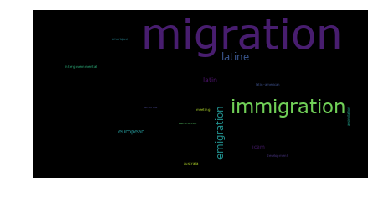

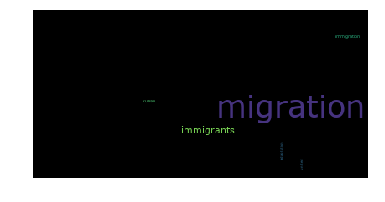

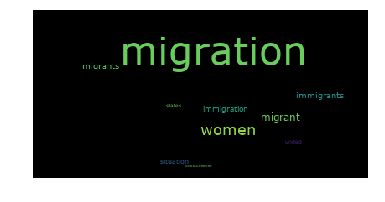

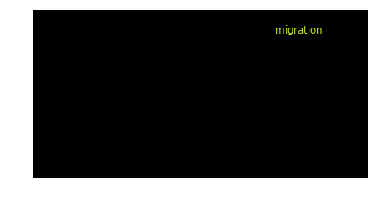

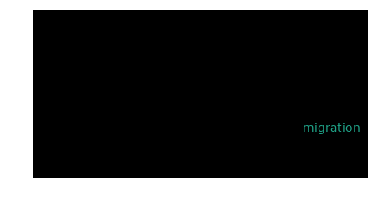

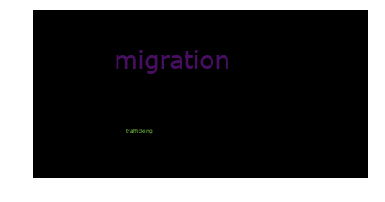

In [118]:
for key in enumerate(wordclouds.keys()):
    plt.figure(key[0])
    plt.imshow(wordclouds[key[1]])
    plt.axis('off')
    #plt.savefig(os.path.join(basedir, 'wc_%s.png' % key[1]))

In [114]:
termfrequencies

{'1960': {'new': 1.5,
  'director': 0.3333333333333333,
  'icem': 12.5,
  'migration': 104.16666666666667,
  'problem': 0.25,
  'encyclical': 1.0,
  'mater': 1.0,
  'magistra': 1.0,
  'argentina': 1.0,
  'immigration': 48.16666666666667,
  'country': 2.6666666666666665,
  'affects': 4.0,
  'emigration': 24.0,
  'sociological': 1.0,
  'methods': 0.3333333333333333,
  'study': 0.16666666666666666,
  'immigrant': 4.166666666666667,
  'adjustement': 1.0,
  'foreword': 4.0,
  'editorial': 2.0,
  'influence': 4.0,
  'australian': 5.0,
  'foreign': 0.8,
  'policy*': 1.0,
  'prospects': 0.16666666666666666,
  'machinery': 1.0,
  'european': 13.5,
  'movements': 0.2,
  'within': 0.2,
  'economic': 4.166666666666667,
  'community': 0.2,
  'importance': 0.3333333333333333,
  'development': 8.166666666666668,
  'brazil': 1.3333333333333333,
  'greece': 0.2,
  'information': 1.3333333333333333,
  'resolutions': 1.0,
  'thirteenth': 1.0,
  'session': 1.0,
  'council': 2.0,
  'intergovernmental': 8.0

In [106]:
# def classify(result, start=1960, end=2020, step=10):
#     for i in result:
#         if i == {}:
#             result.remove(i)
#     ks = {"{i}".format(i=i):[] for i in range(start, end, step)}
#     for i in result:
#         try:
#             x = [k for k in ks.keys() if int(i["PY"]) in range(int(k), int(k)+step)][0] 
#         except IndexError:
#             print (i)
#         ks[x].append(i)
#     return ks

In [120]:
def toktxt(txt):
    ltxt = txt.lower()
    splttxt = nltk.tokenize.word_tokenize(ltxt)
    c = Counter(splttxt)
    return(c)

def freqdst(df, stopwords=stopwords, leaveout=[]):
    stopwords.extend(leaveout)
    groupedtext = {}
   
    grouped = df.groupby(['group'])
    for group in grouped:
        t = group[1].TI.str.cat(sep=', ')
        tok = toktxt(t)
        cleantok = [t for t in tok.keys() if t not in stopwords]
        cleantok = [t for t in cleantok if len(t)>2]
        groupedtext[group[0]] = {t:tok[t] for t in cleantok}

#     txtout = copy(groupedtext)
#     for k in txtout.keys():
#          if txtout[k] == []:
#              del(groupedtext[k])
    return groupedtext

TODO:

Add code for relative frequencies.

## junkyard

I do not believe we need any of these anymore

In [106]:
def allwrds(f):
    wrds = []
    for k in f.keys():
        if f != None:
            wrds.extend(f[k])
    return wrds
    
def termfreq(f, key):
    fc = Counter(allwrds(f))
    ff = Counter(f[key])
    tf = {term:(ff[term]/float(fc[term]))*ff[term] for term in ff}
    return tf
    

def wrdcloud(txt):
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'the', 'in', 'to', 'a', 'of', 'for', ':', 'and', ',', '?', 'with'})
    wordcloud.generate_from_text(txt)
    plt.imshow(wordcloud)
    plt.axis("off")


def simplerun(fl, stopwords=stopwords):
    results = {}
    fl = open(fl)
    rd = DictReader(fl, encoding='utf-8')
    result = [row for row in rd if row['AU']!='' ]
    for item in result:
        item['TI'] = item['TI'].lower().replace('(book)', '')
    ks = classify(result, end=2020)
    f = freqdst(ks, stopwords=stopwords,leaveout=['book'])
    for k in ks:
        tf = termfreq(f, k)
        results[k] = tf
    return results

def simplecloud(fl, stopwords=stopwords):
    wordclouds = {}
    fl = open(fl)
    rd = DictReader(fl, encoding='utf-8')
    result = [row for row in rd if row['AU']!='' ]
    for item in result:
        item['TI'] = item['TI'].lower().replace('(book)', '')
    ks = classify(result, end=2020)
    f = freqdst(ks, stopwords=stopwords)
    for k in ks:
        wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                              relative_scaling=1.0,
                              stopwords=stopwords)
        tf = termfreq(f, k)
        wordcloud.generate_from_frequencies(tf)
        wordclouds[k] = wordcloud
    return wordclouds

def compare_wdcloud(fls, stopwords=stopwords):
    """for title dbs with 'TI' and 'AU' fields"""
    wordclouds = {}    
    for fl in fls:
        wordclouds[fl] = {}
        fl = open(fl)
        rd = DictReader(fl, encoding='utf-8')
        result = [row for row in rd if row['AU']!='' ]
        for item in result:
            item['TI'].lower().replace('(book)', '')
        ks = classify(result, end=2020)
        f = freqdst(ks, stopwords=stopwords)
        for k in ks:
            wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                                  relative_scaling=1.0,
                                  stopwords=stopwords)
            tf = termfreq(f, k)
            wordcloud.generate_from_frequencies(tf)
            wordclouds[fl][k] = wordcloud

In [18]:
import pandas as pd

In [9]:
import sys